## TSF Internship
## Name: Sarthak Wakchaure
## Task 2 : Prediction using Unsupervised Machine Learning 
## GRIP @ The Sparks Foundation 

# Import required libraries

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read data

In [37]:
dataset=pd.read_csv('iris_flower.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [39]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder=LabelEncoder()

In [41]:
dataset['species']=encoder.fit_transform(dataset['species'])

In [42]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
from sklearn.cluster import KMeans

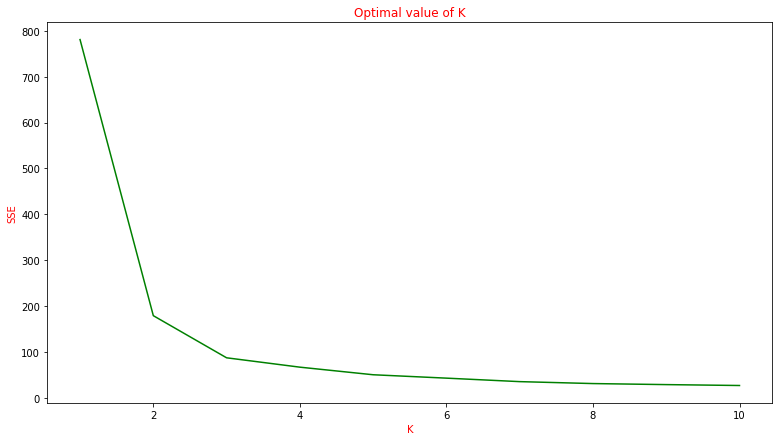

In [44]:
SSE=[]
K=range(1,11)

for k in K:
  km=KMeans(n_clusters=k)
  km.fit(dataset)
  SSE.append(km.inertia_)

plt.figure(figsize=(13,7))
plt.title('Optimal value of K',color='red')
plt.plot(K,SSE,color='green')
plt.xlabel('K',color='red')
plt.ylabel('SSE',color='red')
plt.show()


From above figure the value of k is 3 so we can have 3 clusters in the given dataset

Value of k is determined using ELBOW METHOD

In [45]:
x=dataset.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
km=KMeans(n_clusters=3,random_state=40,max_iter = 700, n_init = 10,)
y_kmeans= km.fit_predict(x)  

# Clusters visualization

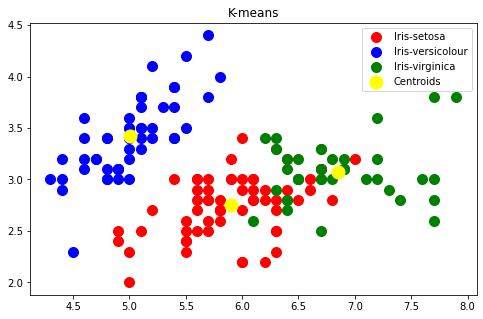

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 170, c = 'yellow', label = 'Centroids')
plt.title('K-means')
plt.legend() 
plt.show()